In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from sklearn.model_selection import RepeatedKFold as rkf
from sklearn.feature_selection import RFECV as rfecv
from sklearn import linear_model as lm
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
#from yellowbrick.regressor import ResidualsPlot as rp

In [2]:
data = pd.read_csv('ready_data2.csv')
# data_test = pd.read_csv(r'D:\SS\Analytics\Python\Python material\case-full\test_data.csv')
data.shape

(1460, 127)

In [3]:
x_train = data.drop(columns='SalePrice')
y_train = data.SalePrice

# x_test = data_test

In [4]:
reg = lm.LinearRegression()

op = rfecv(reg,cv=rkf(n_splits=10, n_repeats=5, random_state=42))

fit1 = op.fit(x_train,y_train)
print("R square:",fit1.score(x_train,y_train))

coln_index = fit1.get_support(indices=True)
print("Number of columns selected is",len(coln_index))

df = pd.DataFrame()
for i in coln_index:
    df = pd.concat([df,(x_train.iloc[:,i])],axis=1)
colns = list(df.columns)

y_pred = fit1.predict(x_train)
# RFECV_coef = fit1.estimator_.coef_
# RFECV_intercept = fit1.estimator_.intercept_
# RFECV_intercept

R square: 0.8560489192623475
Number of columns selected is 117


In [6]:
x1_train = data[colns]
y1_train = data['SalePrice']
x1_train = sm.add_constant(x1_train)
sum_op = sm.OLS(y1_train,x1_train).fit()
print(sum_op.summary())

y1_pred = sum_op.predict(x1_train)
# y1_pred = sum_op.predict(x_test[colns])
# y1_pred
# SM_coef = sum_op.params
# SM_coef

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     71.52
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        08:37:55   Log-Likelihood:                -17129.
No. Observations:                1460   AIC:                         3.448e+04
Df Residuals:                    1347   BIC:                         3.508e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.663e+

<function matplotlib.pyplot.show(*args, **kw)>

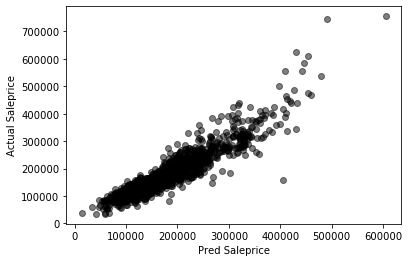

In [7]:
plt.scatter(y1_pred,data.SalePrice,alpha = .5,c='k')
plt.xlabel("Pred Saleprice")
plt.ylabel("Actual Saleprice")
plt.show

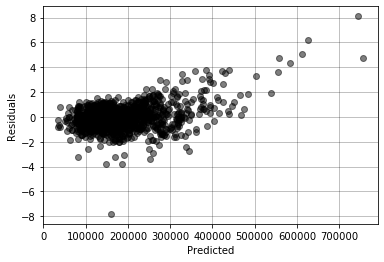

In [8]:
residuals = sum_op.resid_pearson
plt.scatter(data.SalePrice,residuals,alpha = .5, c='k')
plt.grid(True,c='k',alpha = .3)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### OR ###
# vis = rp(op)
# vis.fit(x_train, y_train)
# vis.show()

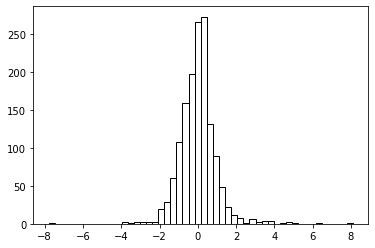

In [9]:
plt.hist(residuals,bins=50,color='white',edgecolor='black')
plt.show()

In [10]:
influence = sum_op.get_influence()
(cd,p) = influence.cooks_distance
# cd
dof_resid = sum_op.df_resid
# dof

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [11]:
df_cd = data.loc[cd<4/dof_resid,list(data.columns)].reset_index(drop=True)
df_cd.shape

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(1367, 127)

In [12]:
x_train = df_cd.drop(columns='SalePrice')
y_train = df_cd.SalePrice

fit2 = op.fit(x_train,y_train)
print("R square:",fit2.score(x_train,y_train))

coln_index = fit2.get_support(indices=True)
print("Number of columns selected is",len(coln_index))

df = pd.DataFrame()
for i in coln_index:
    df = pd.concat([df,(x_train.iloc[:,i])],axis=1)
colns = list(df.columns)

y_pred = fit2.predict(x_train)

R square: 0.9255226648100083
Number of columns selected is 115


In [13]:
x1_train = df_cd[colns]
y1_train = df_cd['SalePrice']
x1_train = sm.add_constant(x1_train)
sum_op1 = sm.OLS(y1_train,x1_train).fit()
print(sum_op1.summary())

y1_pred = sum_op1.predict(x1_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        08:38:43   Log-Likelihood:                -15384.
No. Observations:                1367   AIC:                         3.097e+04
Df Residuals:                    1268   BIC:                         3.148e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -5.63e+

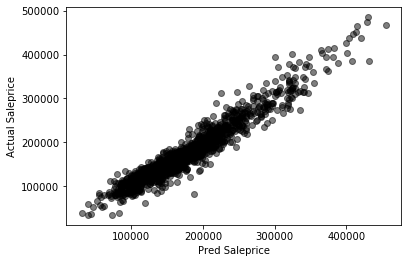

In [14]:
plt.scatter(y1_pred,df_cd.SalePrice,alpha = .5,c='k')
plt.xlabel("Pred Saleprice")
plt.ylabel("Actual Saleprice")
plt.show()

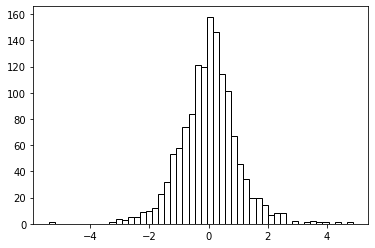

In [15]:
residuals1 = sum_op1.resid_pearson
plt.hist(residuals1,bins=50,color='white',edgecolor='black')
plt.show()

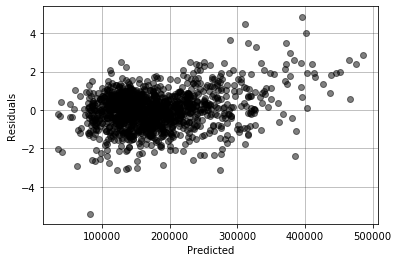

In [16]:
plt.scatter(df_cd.SalePrice,residuals1,alpha = .5, c='k')
plt.grid(True,c='k',alpha = .3)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

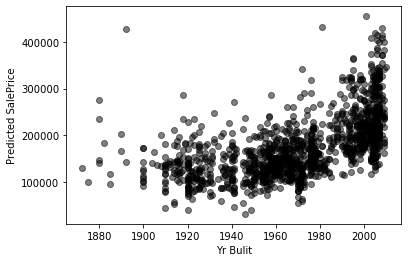

In [17]:
plt.scatter(df_cd.YearBuilt,y1_pred,alpha = .5, c='k')
plt.xlabel("Yr Bulit")
plt.ylabel("Predicted SalePrice")
plt.show()

In [18]:
df_cd['g1985'] = np.where(df_cd['YearBuilt'] > 1985, '1', '0')
df_cd.g1985

0       1
1       0
2       1
3       0
4       1
       ..
1362    1
1363    0
1364    0
1365    0
1366    0
Name: g1985, Length: 1367, dtype: object

In [19]:
enc = OneHotEncoder(drop='first',sparse=False)

addn_colns = pd.DataFrame(enc.fit_transform(df_cd[['g1985']]))
addn_colns.columns = enc.get_feature_names(['g1985'])
df_cd.drop('g1985', axis=1, inplace=True)
df_cd = pd.concat([df_cd, addn_colns], axis=1)
df_cd.drop('YearBuilt', axis=1, inplace=True)
# df_cd.to_csv(r'D:\SS\Analytics\Python\Python material\case-full\g1980.csv')

In [20]:
x_train = df_cd.drop(columns='SalePrice')
y_train = df_cd.SalePrice

fit3 = op.fit(x_train,y_train)
print("R square:",fit3.score(x_train,y_train))

coln_index = fit3.get_support(indices=True)
print("Number of columns selected is",len(coln_index))

df = pd.DataFrame()
for i in coln_index:
    df = pd.concat([df,(x_train.iloc[:,i])],axis=1)
colns = list(df.columns)

y_pred = fit3.predict(x_train)

R square: 0.9253741169148103
Number of columns selected is 108


In [21]:
x2_train = df_cd[colns]
y2_train = df_cd.SalePrice

x2_train = sm.add_constant(x2_train)
sum_op2 = sm.OLS(y2_train,x2_train).fit()
print(sum_op2.summary())

y2_pred = sum_op2.predict(x2_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        08:39:25   Log-Likelihood:                -15385.
No. Observations:                1367   AIC:                         3.097e+04
Df Residuals:                    1268   BIC:                         3.148e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.614e+

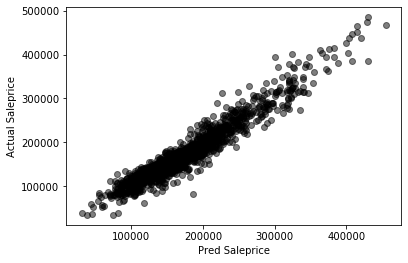

In [22]:
plt.scatter(y2_pred,df_cd.SalePrice,alpha = .5,c='k')
plt.xlabel("Pred Saleprice")
plt.ylabel("Actual Saleprice")
plt.show()

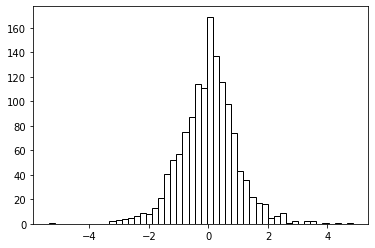

In [23]:
residuals2 = sum_op2.resid_pearson
plt.hist(residuals2,bins=50,color='white',edgecolor='black')
plt.show()

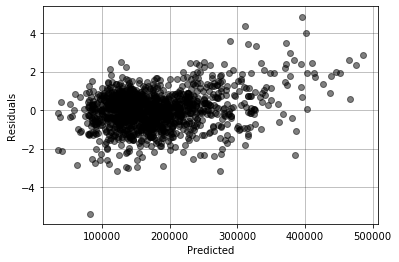

In [24]:
plt.scatter(df_cd.SalePrice,residuals2,alpha = .5, c='k')
plt.grid(True,c='k',alpha = .3)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [25]:
influence1 = sum_op2.get_influence()
(cd1,p) = influence1.cooks_distance
# cd
dof_resid1 = sum_op2.df_resid
# dof

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [26]:
df_yr = df_cd.loc[cd1<4/dof_resid1,list(df_cd.columns)].reset_index(drop=True)
df_yr.shape

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(1285, 127)

In [27]:
x_train = df_yr.drop(columns='SalePrice')
y_train = df_yr.SalePrice

fit3 = op.fit(x_train,y_train)
print("R square:",fit3.score(x_train,y_train))

coln_index = fit3.get_support(indices=True)
print("Number of columns selected is",len(coln_index))

df = pd.DataFrame()
for i in coln_index:
    df = pd.concat([df,(x_train.iloc[:,i])],axis=1)
colns = list(df.columns)

y_pred = fit3.predict(x_train)

R square: 0.9435634257369824
Number of columns selected is 99


In [28]:
x3_train = df_yr[colns]
y3_train = df_yr.SalePrice

x3_train = sm.add_constant(x3_train)
sum_op3 = sm.OLS(y3_train,x3_train).fit()
print(sum_op3.summary())

y3_pred = sum_op3.predict(x3_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        08:40:02   Log-Likelihood:                -14192.
No. Observations:                1285   AIC:                         2.857e+04
Df Residuals:                    1193   BIC:                         2.904e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.067e+

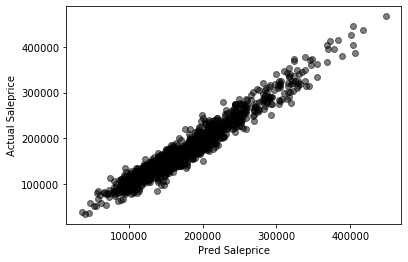

In [29]:
plt.scatter(y3_pred,df_yr.SalePrice,alpha = .5,c='k')
plt.xlabel("Pred Saleprice")
plt.ylabel("Actual Saleprice")
plt.show()

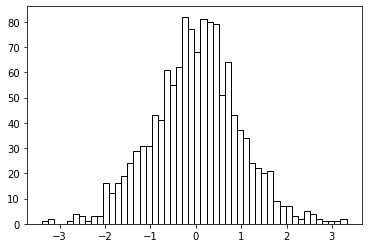

In [30]:
residuals3 = sum_op3.resid_pearson
plt.hist(residuals3,bins=50,color='white',edgecolor='black')
plt.show()

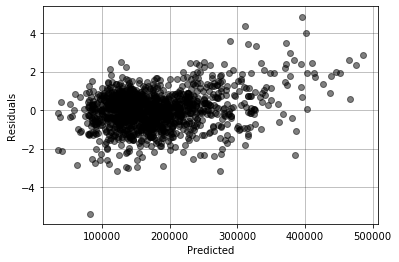

In [31]:
plt.scatter(df_cd.SalePrice,residuals2,alpha = .5, c='k')
plt.grid(True,c='k',alpha = .3)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()